Initial libraries imported here, additional libraries will be imported as needed below when used.

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Read dataset & show the top 5 rows

In [200]:
df = pd.read_csv('data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Next couple or calls are to build a broader understanding of data: statisical info, datatypes, etc

In [201]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Quick plot to look at balance of 'Outcome' column (0 vs 1 to show no vs yes for diabetes)

<Axes: xlabel='Outcome', ylabel='count'>

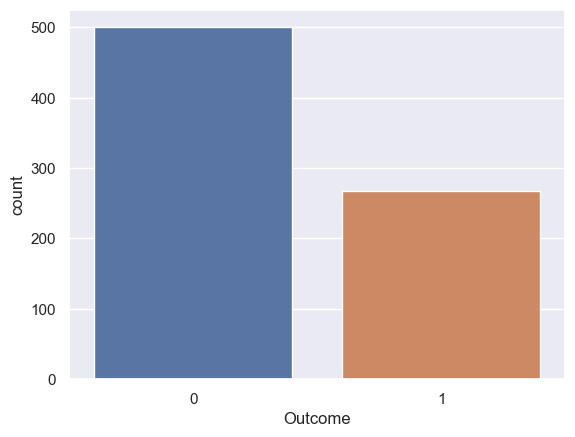

In [203]:
sns.countplot(x='Outcome', data=df)

Checking number of nulls to determine what kind of pre-processing is required to address that possibility

In [204]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Assessing entries with values of '0' where it is not medically possible.  Ex: blood pressure can't be zero, BMI can't be zero, etc

In [205]:
print('Blood Pressure = 0: ',df[df['BloodPressure']==0].shape[0])
print('Glucose = 0:        ',df[df['Glucose']==0].shape[0])
print('Skin Thickness = 0: ',df[df['SkinThickness']==0].shape[0])
print('Insulin = 0:        ',df[df['Insulin']==0].shape[0])
print('BMI = 0:            ',df[df['BMI']==0].shape[0])

Blood Pressure = 0:  35
Glucose = 0:         5
Skin Thickness = 0:  227
Insulin = 0:         374
BMI = 0:             11


Plot histogram of the various columns to look at distribution.  Between the histogram and the data immediately above, something needs to be done to process the "impossible" data entries to make the data more usable.

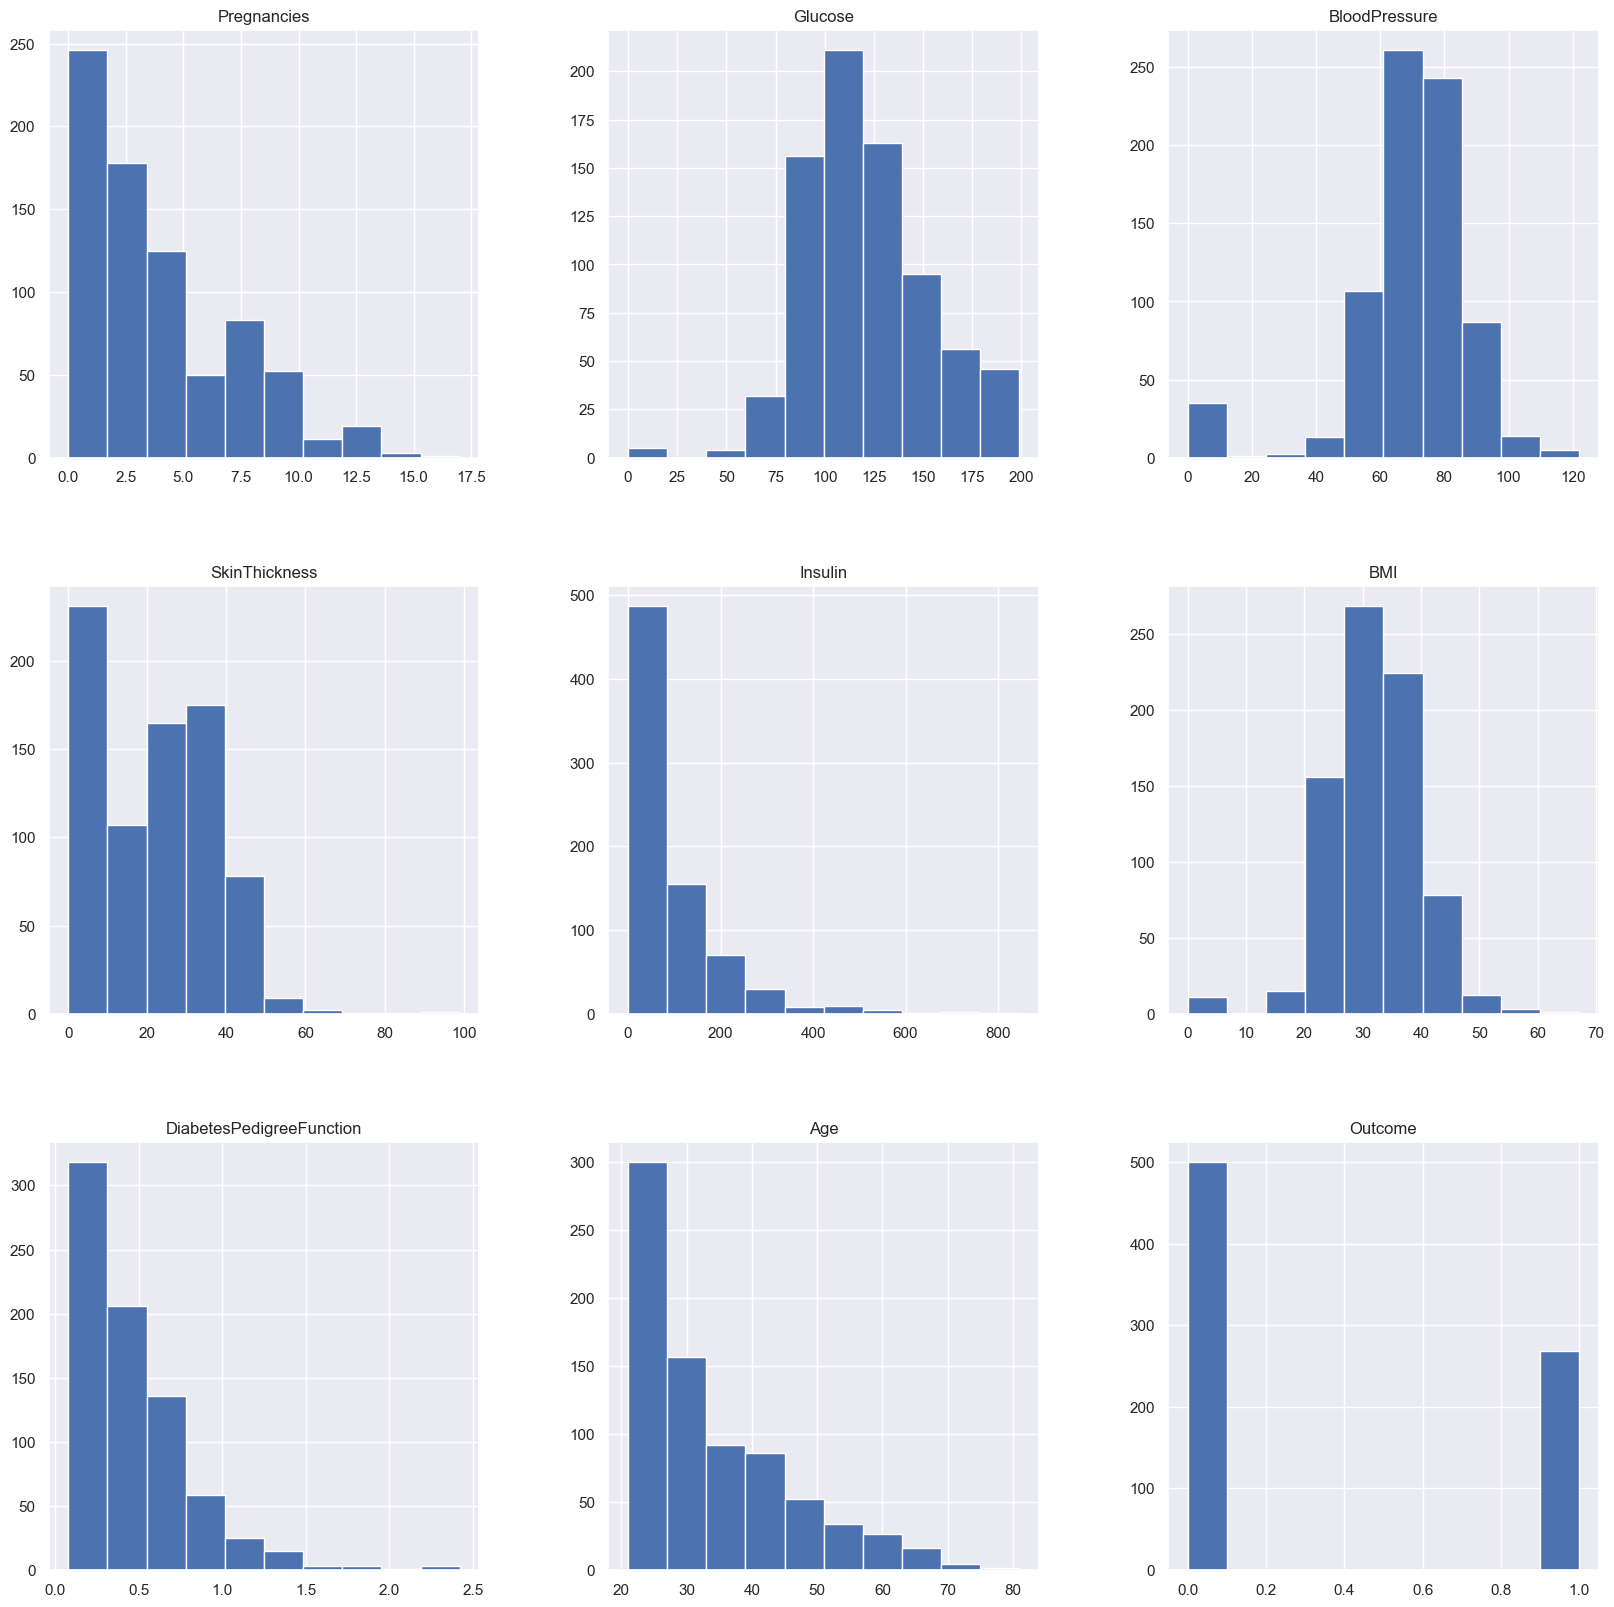

In [206]:
plot = df.hist(figsize = (20,20))

To be able to better analyze the data we need to hoose a suitable replacement for the '0' entries in the 'Glucose', 'BloodPressure','SkinThickness','Insulin', and'BMI' entries.  Depending on the type of distibution, we can decide whether using the mean or median is more appropriate.  Both 'Glucose' and 'BloodPressure' follow a normal distribution so replacing with mean makes sense.  'SkinThickness', 'Insulin', and 'BMI' are skewed so the mean is affected by outliers; replacing zeroes with median is a more appropriate choice.

In [207]:
df['Glucose'].replace(0,df['Glucose'].mean(), inplace=True)
df['BloodPressure'].replace(0,df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].replace(0,df['SkinThickness'].median(), inplace=True)
df['Insulin'].replace(0,df['Insulin'].median(), inplace=True)
df['BMI'].replace(0,df['BMI'].median(), inplace=True)

Plotting another histogram with the zeroes replaced shows much more logical data throughout the dataset.

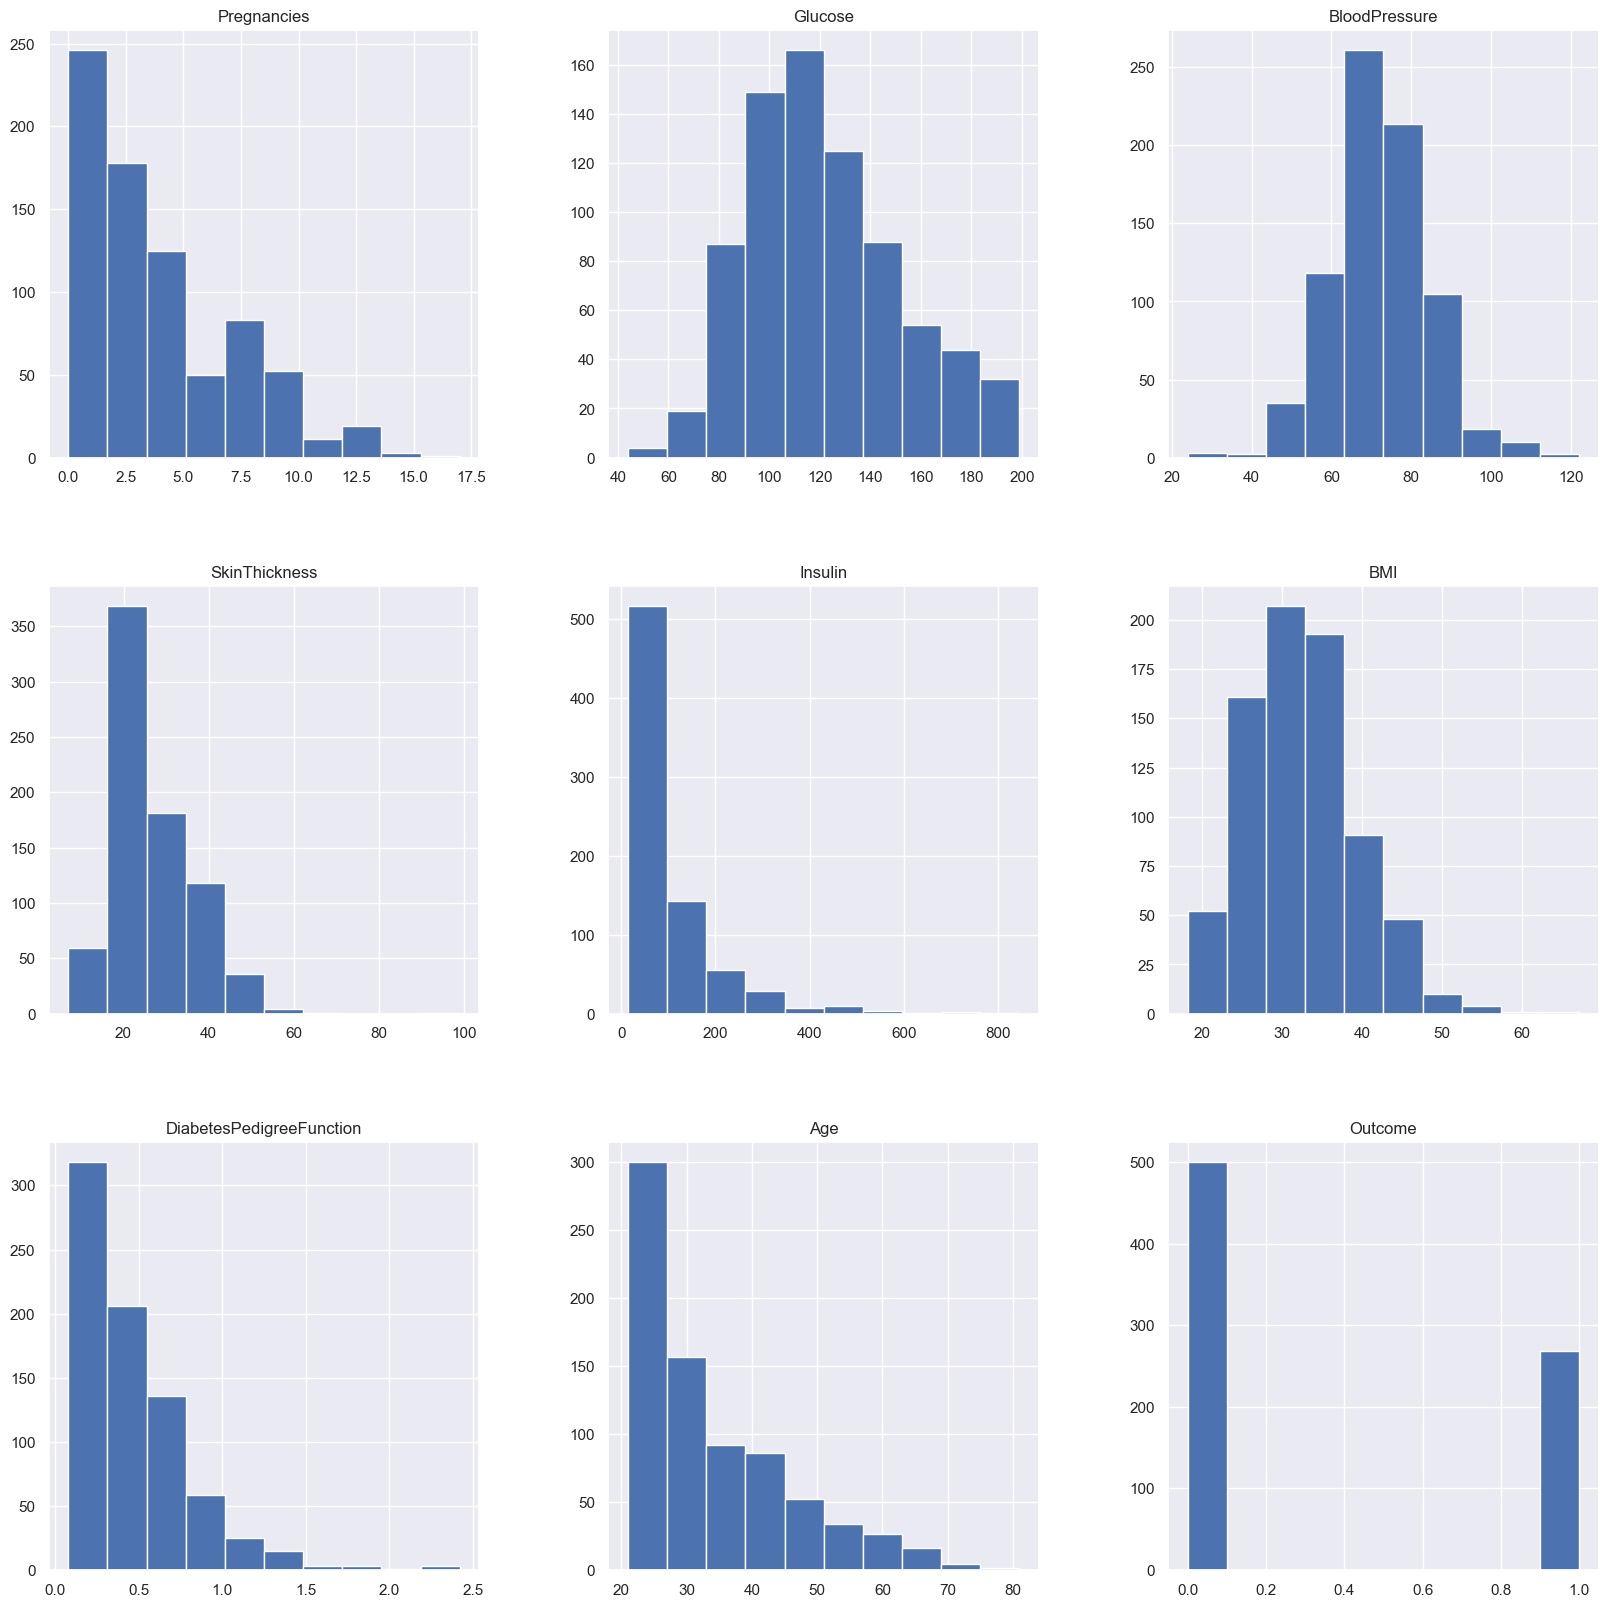

In [208]:
plot = df.hist(figsize = (20,20))

Next I'll use a box plot to show outliers.

<Axes: xlabel='DiabetesPedigreeFunction'>

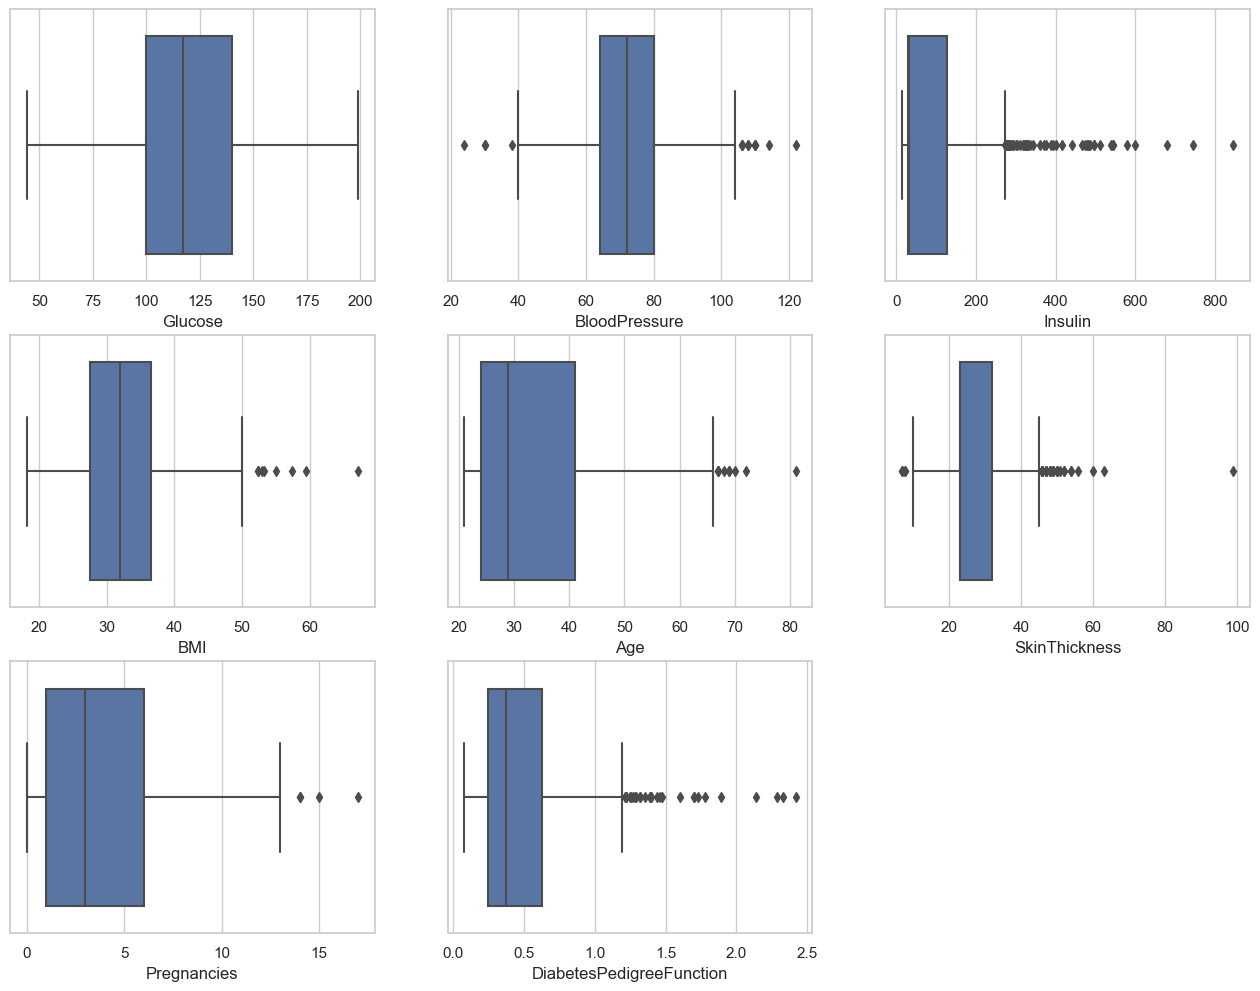

In [209]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

A heatmap here will be used to identify correlation between the various features.

<Axes: >

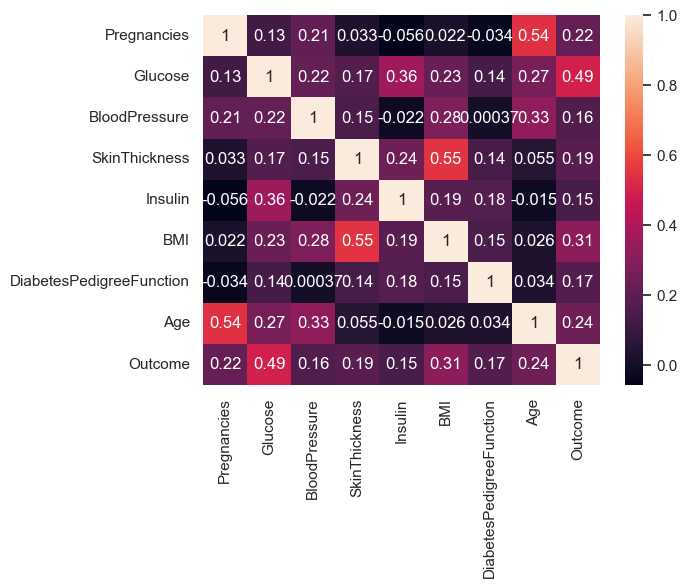

In [210]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

From the heatmap you can see that 'BloodPressure', 'Insulin', and 'DiabetesPedigreeFunction' are not strogly correlated sho I've decided to drop them.

In [211]:
df_corr=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

In [212]:
#I'm utilizing QuantileTransformer in order to transform the data, this is not as quick as StandardScaler which
#we've worked with in the past, but does a good job handling outliers 
from sklearn.preprocessing import QuantileTransformer

In [213]:
quantile  = QuantileTransformer()
X = quantile.fit_transform(df_corr)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df_new.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


Another boxplot after being transformed to show removal of outliers

<Axes: xlabel='SkinThickness'>

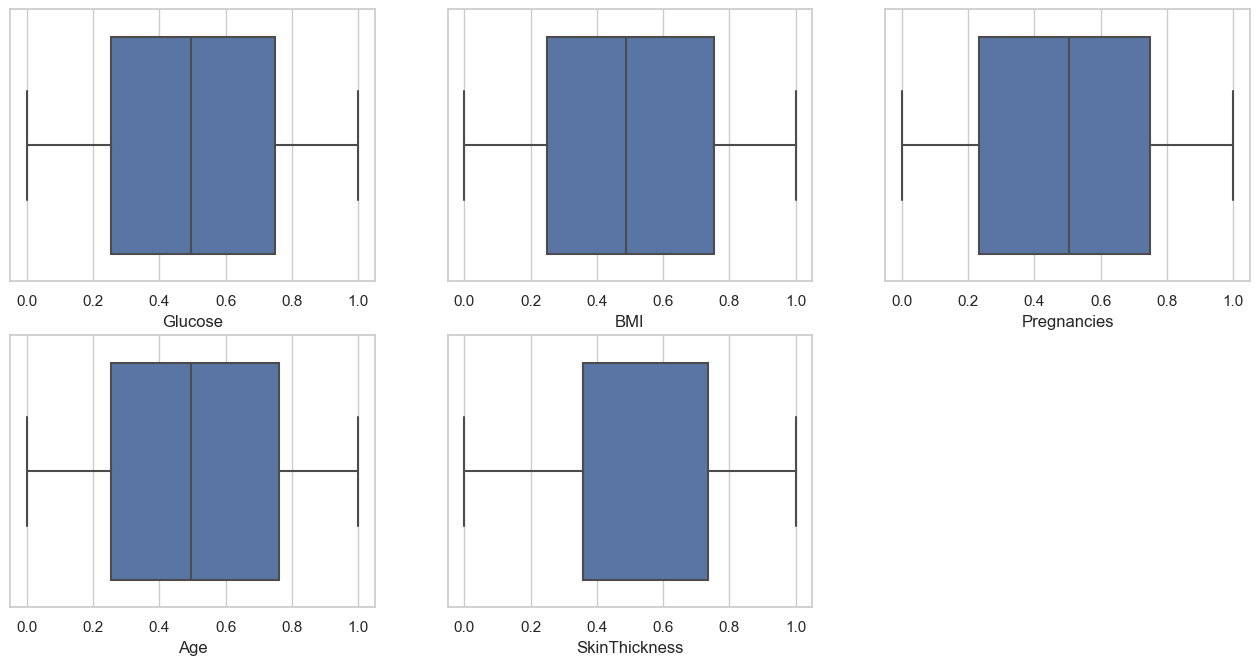

In [214]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BMI'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['SkinThickness'],data=df_new)

Preparing to split into test/train sets.  I'm using the normal test_train_split function with test_size=.2

In [215]:
X = df_new.drop("Outcome",axis = 1)
y = df_new.Outcome

In [216]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [217]:
X_train.shape,y_train.shape

((614, 5), (614,))

In [218]:
X_test.shape,y_test.shape

((154, 5), (154,))

I'm going to run through five different classifiers utilizing a gridsearch on each to identify the best parameters for each classifier and then assessing which is the best classifier.  I will look at KNeighbors, Bayes, SVM, DecisionTree, and Logistic Regression.

In [219]:
#Libraries required for KNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Classification Report is:
               precision    recall  f1-score   support

         0.0       0.83      0.77      0.80        99
         1.0       0.63      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


 Best Parameters:
 {'metric': 'euclidean', 'n_neighbors': 21, 'p': 1, 'weights': 'distance'}

 Confusion Matrix:



<Axes: >

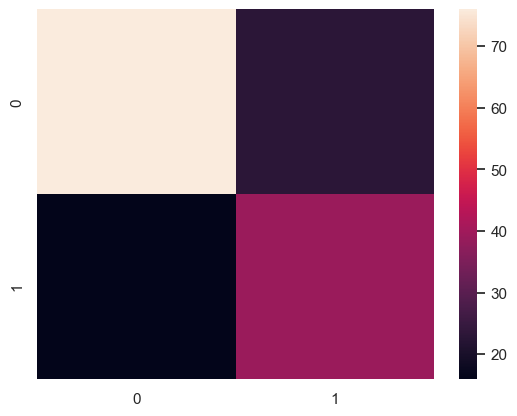

In [238]:
knn= KNeighborsClassifier()

#List of Hyperparameters to tune
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

#convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

#Build model
knn_grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters,scoring='f1',verbose=1)

#Fit model
knn_best_model = knn_grid_search.fit(X_train,y_train)

#Predict testing set
knn_pred = knn_best_model.predict(X_test)
KNN_acc=accuracy_score(y_test,knn_pred).round(3)

#Display results
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n Best Parameters:\n", knn_best_model.best_params_)
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_pred))

In [222]:
#Libraries required for NaiveBayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Classification Report is:
               precision    recall  f1-score   support

         0.0       0.78      0.80      0.79        99
         1.0       0.62      0.60      0.61        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154


 Best Parameters:
 {'var_smoothing': 0.657933224657568}

 Confusion Matrix:



<Axes: >

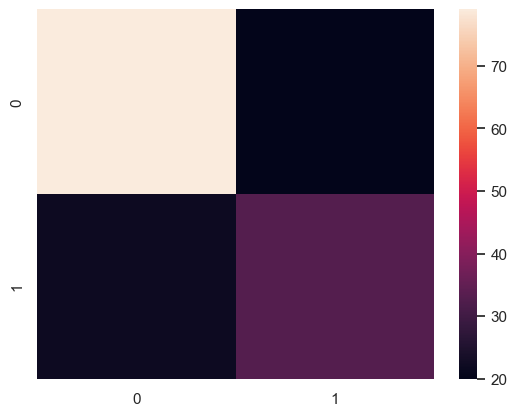

In [239]:
nb = GaussianNB()

#set parameters
param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}

#build model
nb_Model_grid = GridSearchCV(estimator=nb, param_grid=param_grid_nb, verbose=1, cv=10)

#fit model
nb_best_model= nb_Model_grid.fit(X_train, y_train)

#Predict test set
nb_pred=nb_best_model.predict(X_test)
Bayes_acc=accuracy_score(y_test,nb_pred).round(3)

#Display results
print("Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n Best Parameters:\n", nb_Model_grid.best_params_)
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_pred))

In [225]:
#Libraries required for SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Classification Report is:
               precision    recall  f1-score   support

         0.0       0.90      0.84      0.87        99
         1.0       0.74      0.84      0.79        55

    accuracy                           0.84       154
   macro avg       0.82      0.84      0.83       154
weighted avg       0.84      0.84      0.84       154


 Best Parameters:
 {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

 Confusion Matrix:



<Axes: >

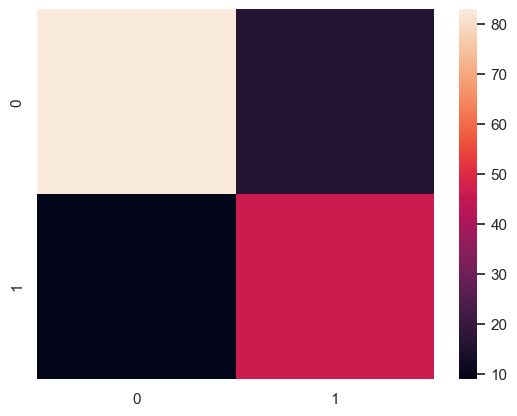

In [244]:
svm = SVC()

#Set parameters
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

# define grid search
svm_grid = dict(kernel=kernel,C=C,gamma=gamma)

#Build model
svm_grid_search = GridSearchCV(estimator=svm, param_grid=svm_grid, scoring='f1',verbose=1)

#Fit model
svm_grid_result = svm_grid_search.fit(X, y)

#Predict test results
svm_pred=svm_grid_result.predict(X_test)
SVM_acc=accuracy_score(y_test,svm_pred).round(3)

#Display results
print("Classification Report is:\n",classification_report(y_test,svm_pred))
print("\n Best Parameters:\n", svm_grid_result.best_params_)
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,svm_pred))

In [228]:
#Libraries required for DecisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV

Fitting 4 folds for each of 40 candidates, totalling 160 fits
Classification Report is:
               precision    recall  f1-score   support

         0.0       0.78      0.81      0.79        99
         1.0       0.63      0.58      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154


 Best Parameters:
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50}

 Confusion Matrix:



<Axes: >

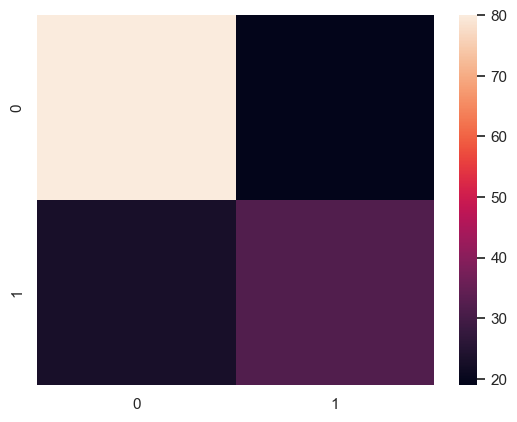

In [241]:
dt = DecisionTreeClassifier(random_state=42)

#Set parameters
dt_params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]
}

#Build model
dt_grid_search = GridSearchCV(estimator=dt, param_grid=dt_params, cv=4, verbose=1, scoring = "accuracy")

#Fit model
dt_best_model=dt_grid_search.fit(X_train, y_train)

#Predict test results
dt_pred=dt_best_model.predict(X_test)
DT_acc=accuracy_score(y_test,dt_pred).round(3)

#Show results
print("Classification Report is:\n",classification_report(y_test,dt_pred))
print("\n Best Parameters:\n", dt_best_model.best_params_)
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,dt_pred))


In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.79      0.82      0.81        99
         1.0       0.65      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154


 Confusion Matrix:



<Axes: >

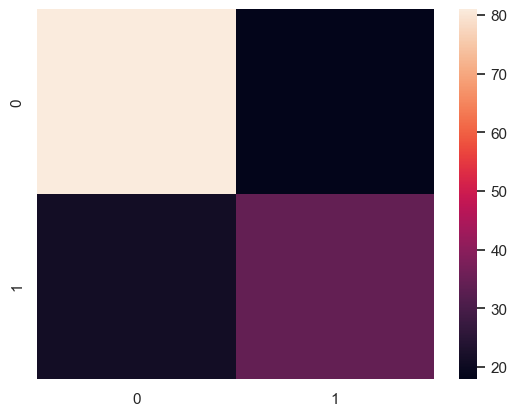

In [242]:
reg = LogisticRegression()

#Fit model
reg.fit(X_train,y_train) 

#Predict test results
lr_pred=reg.predict(X_test)
lr_acc=accuracy_score(y_test,lr_pred).round(3)

#Show results
print("Classification Report is:\n",classification_report(y_test,lr_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,lr_pred))

In [243]:
pd.DataFrame({'Model': ['KNNBasic', 'Bayes','SVM','DecisionTree','LogisticRegression'], 
              'Accuracy' : [KNN_acc,Bayes_acc,SVM_acc,DT_acc,LR_acc]}).set_index('Model')

,Accuracy
Model,
KNNBasic,0.747
Bayes,0.727
SVM,0.838
DecisionTree,0.727
LogisticRegression,.75
